In [191]:
import pandas as pd
valids = pd.read_csv("BIOL 302L Research Project - Sheet1.csv")

valids.dropna(subset=["Head Length","Head Width","Tail Length"], how='all', inplace=True)

In [192]:
def remove_nm(x):
    
    return int(x["Head Length"].strip("nm")), int(x["Head Width"].strip("nm")),int(x["Tail Length"].strip("nm"))
new = valids.apply(lambda x: remove_nm(x), axis = 1)



valids[["Head Length","Head Width","Tail Length"]] = pd.DataFrame(new.tolist(), columns = ["Head Length","Head Width","Tail Length"])







In [193]:
valids["Circumsphere radius"] = valids[["Head Length","Head Width"]].mean(axis = 1)/2




In [194]:
import math

def get_vol(x):
    rad = x["Circumsphere radius"]
    edge = 4*rad/(3.804226065180614)
    volume = (edge**3) * (3+math.sqrt(5)) * 5/12
    return volume
valids["volume"] = valids.apply(lambda x: get_vol(x), axis = 1)

In [195]:
import math
math.sqrt(10+(2*math.sqrt(5)))

3.804226065180614

In [196]:
valids

Phage Name  Genome Size  \
0   Abt2graduatex2        57385   
1         Microdon        53356   
2          Nanodon        50082   
3      ClubPenguin        56205   
4           Enygma       133969   
..             ...          ...   
89         Nesbitt        42446   
90         Braelyn       131234   
91       Daubenski       133090   
92         Esketit        54664   
93             Evy       132977   

                                            TEM Image  Head Length  \
0   https://phagesdb.org/media/emPics/Abt2graduate...           90   
1   https://phagesdb.org/media/emPics/Microdon_EMP...           60   
2   https://phagesdb.org/media/emPics/Nanodon_EMPi...           60   
3   https://phagesdb.org/media/emPics/ClubPenguin_...           53   
4   https://phagesdb.org/media/emPics/Enygma_EMPic...           70   
..                                                ...          ...   
89  https://phagesdb.org/media/emPics/Nesbitt_EMPi...           70   
90  https://phagesdb.org/media/emPics/Braelyn_EMPi...           55   
91  https://phagesdb.org/media/emPics/Daubenski_EM...           60   
92  https://phagesdb.org/media/emPics/Esketit_EMPi...           53   
93    https://phagesdb.org/media/emPics/Evy_EMPic.TIF           99   

    Head Width  Tail Length Gel Estimation  Circumsphere radius         volume  
0           50          200            NaN                35.00  108737.461696  
1           60          200            NaN                30.00   68476.069173  
2           60          230            NaN                30.00   68476.069173  
3           54          250           29kb                26.75   48545.213662  
4           70          250            NaN                35.00  108737.461696  
..         ...          ...            ...                  ...            ...  
89          65           83            NaN                33.75   97498.153178  
90          50          303            NaN                26.25   45873.616653  
91          63          252            NaN                30.75   73741.236930  
92          51          515            NaN                26.00   44575.384881  
93          95          410            NaN                48.50  289334.534632  

[94 rows x 9 columns]

Text(0.5, 0, 'Computed Phage Capsid Volume ($nm^3$) ($log_{10}$ scale)')

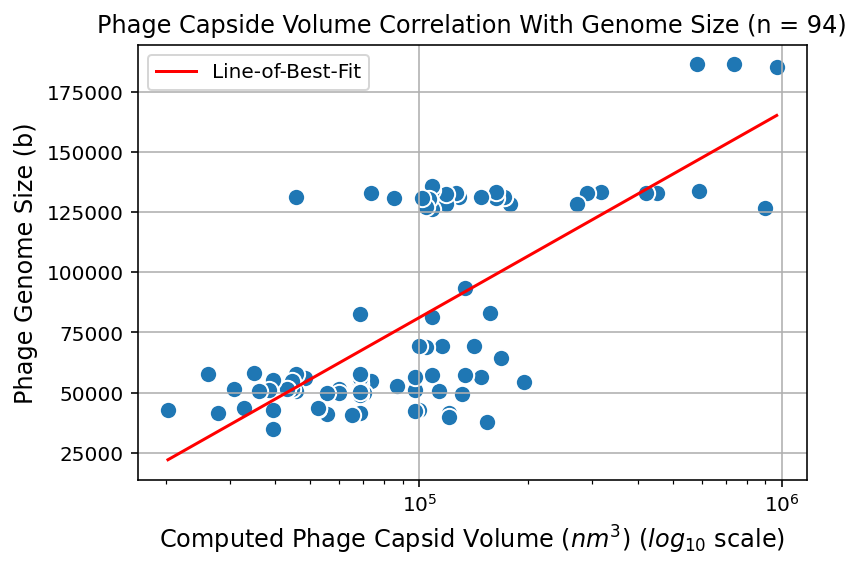

In [206]:
import seaborn as sns 
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

valids = valids.sort_values(by='volume', ascending=False)
plt.xscale('log')

p = np.polyfit(np.log10(valids["volume"]),valids["Genome Size"], 1)
y_fit = (np.polyval(p, np.log10(valids["volume"])))
plt.plot(valids["volume"], y_fit, 'r-', label = "Line-of-Best-Fit")

plt.grid()

plt.scatter(valids["volume"], valids["Genome Size"],edgecolors='w', s= 75)
plt.legend()
plt.title('Phage Capside Volume Correlation With Genome Size (n = 94)', fontsize=12)

plt.ylabel('Phage Genome Size (b)', fontsize=12)

plt.xlabel('Computed Phage Capsid Volume ($nm^3$) ($log_{10}$ scale)', fontsize=12)


In [211]:
a, b = np.polyfit(np.log10(valids["volume"]),valids["Genome Size"], 1)
a, b

(85294.40858388475, -345328.75960523175)

In [208]:
import scipy
import numpy as np

array = []
error = []

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(np.log10(valids["Head Length"]), valids["Genome Size"])
array.append(r_value)

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(np.log10(valids["Head Width"]), valids["Genome Size"])
array.append(r_value)
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(np.log10(valids["Tail Length"]), valids["Genome Size"])
array.append(r_value)
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(np.log10(valids["volume"]), valids["Genome Size"])
array.append(r_value)


In [209]:
array

[0.6566688525867224,
 0.3760154711959606,
 0.5370974800911557,
 0.6966304168368463]

Text(0.5, 0, 'Phage Morphology Characteristics')

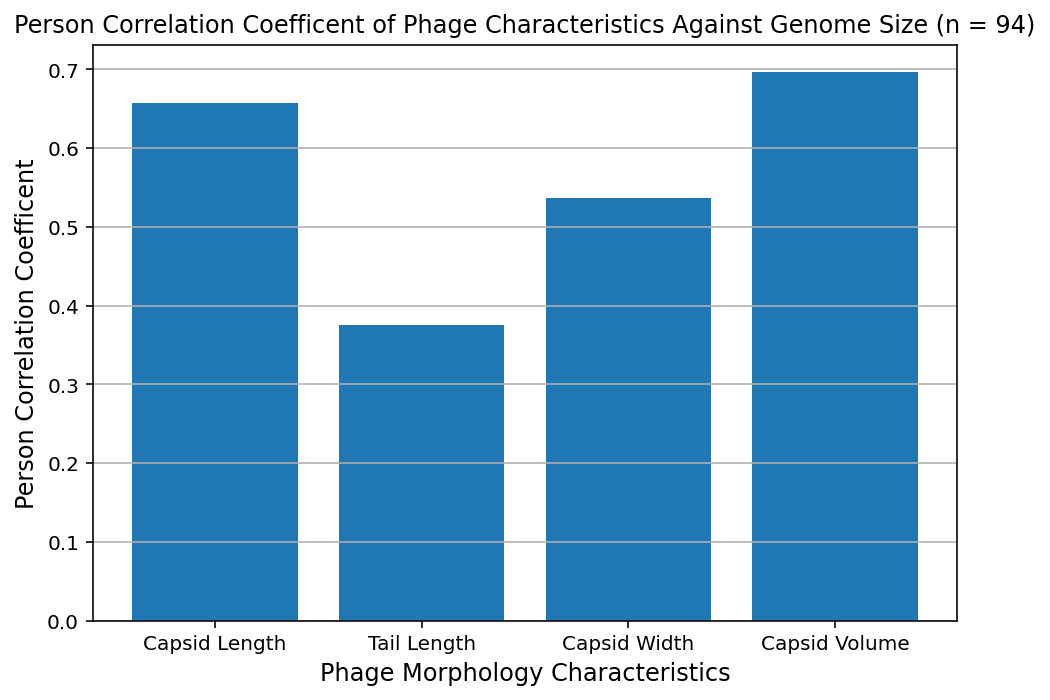

In [210]:
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['Capsid Length', "Tail Length", "Capsid Width", "Capsid Volume"]
students = array
ax.bar(langs,students)
plt.grid(axis='y')

plt.title('Person Correlation Coefficent of Phage Characteristics Against Genome Size (n = 94)', fontsize=12)

plt.ylabel('Person Correlation Coefficent', fontsize=12)

plt.xlabel('Phage Morphology Characteristics', fontsize=12)

In [202]:
gel_preds = valids.dropna(subset=["Gel Estimation"], how='all')
def remove_kb(x):
    return float(x["Gel Estimation"].strip("kb"))*1000
gel_preds["Gel Estimation"]  = gel_preds.apply(lambda x: remove_kb(x), axis = 1)
len(gel_preds)

<ipython-input-202-d7c7d353d2bc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gel_preds["Gel Estimation"]  = gel_preds.apply(lambda x: remove_kb(x), axis = 1)


12

Text(0.5, 0, 'Predicted Genome Size (b)')

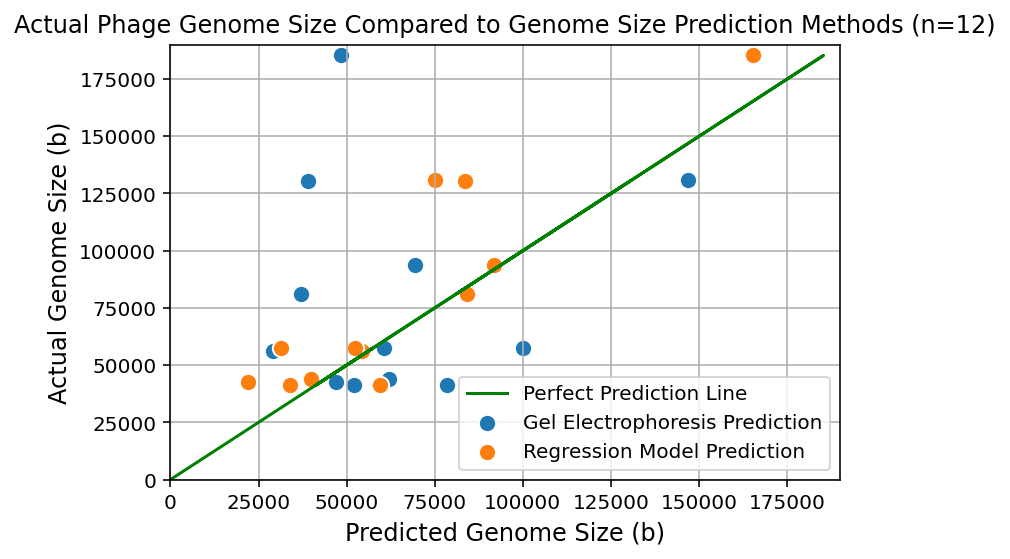

In [213]:
import seaborn as sns 
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'


plt.scatter(gel_preds["Gel Estimation"], gel_preds["Genome Size"],edgecolors='w', s=75, label = "Gel Electrophoresis Prediction")

p = np.polyfit(np.log10(valids["volume"]),valids["Genome Size"], 1)
y_fit = (np.polyval(p, np.log10(gel_preds["volume"])))


plt.scatter( y_fit, gel_preds["Genome Size"],edgecolors='w' , s=75, label = "Regression Model Prediction")

x = [0]
x.extend(list(gel_preds["Genome Size"]))
plt.plot(x, x, c = 'g', label = "Perfect Prediction Line")
plt.xlim([0, 190000])
plt.ylim([0, 190000])

plt.grid()

plt.legend()

plt.title('Actual Phage Genome Size Compared to Genome Size Prediction Methods (n=12)', fontsize=12)

plt.ylabel('Actual Genome Size (b)', fontsize=12)

plt.xlabel('Predicted Genome Size (b)', fontsize=12)


In [204]:
y_fit

array([165174.40302544,  91913.31113579,  84246.22488405,  83449.60016119,
        75152.56354826,  59448.57814791,  54373.32756081,  52276.49793938,
        39978.38023817,  33904.26338698,  31378.50300613,  22056.86500581])

Text(0.5, 0, 'Genome Size Prediction Method')

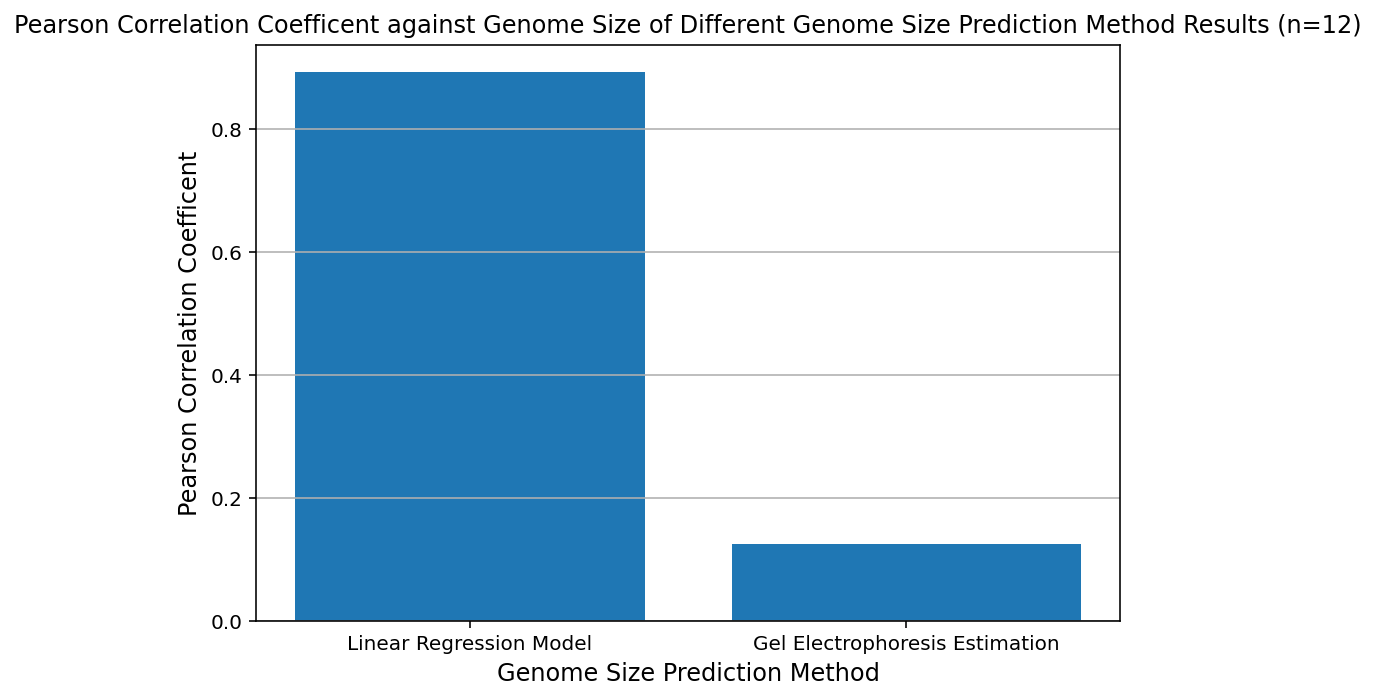

In [205]:
new_arr = []
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(gel_preds["Genome Size"], y_fit)
new_arr.append(r_value)
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(gel_preds["Genome Size"], gel_preds["Gel Estimation"])
new_arr.append(r_value)

import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['Linear Regression Model', "Gel Electrophoresis Estimation"]
students = new_arr
ax.bar(langs,students)
plt.grid(axis='y')
plt.title('Pearson Correlation Coefficent against Genome Size of Different Genome Size Prediction Method Results (n=12)', fontsize=12)

plt.ylabel('Pearson Correlation Coefficent', fontsize=12)

plt.xlabel('Genome Size Prediction Method', fontsize=12)


In [212]:
(np.polyval(p, np.log10([68476.069])))


array([67115.66430593])

In [214]:
new_arr

[0.8926392559104677, 0.12461707804213058]